In [601]:
from importlib import reload
import matplotlib.pyplot as plt

In [602]:
import VAE
reload(VAE)
from VAE import *

In [603]:
Nz = 200
grid = np.linspace(0, 1, Nz)
dx = grid[1] - grid[0]
x = generate_leaks(grid, 1000, random_state=0)

In [ ]:
net = VAE([Nz, 64, 16, 8, 4], [4, 8, 16, 64, Nz], dx, 'tanh', structure=True)
model = Model(x, net)
model.train(10000, val_interval=100)

step       loss       rec        reg


KeyboardInterrupt: 

torch.Size([10, 50])
(10, 50)


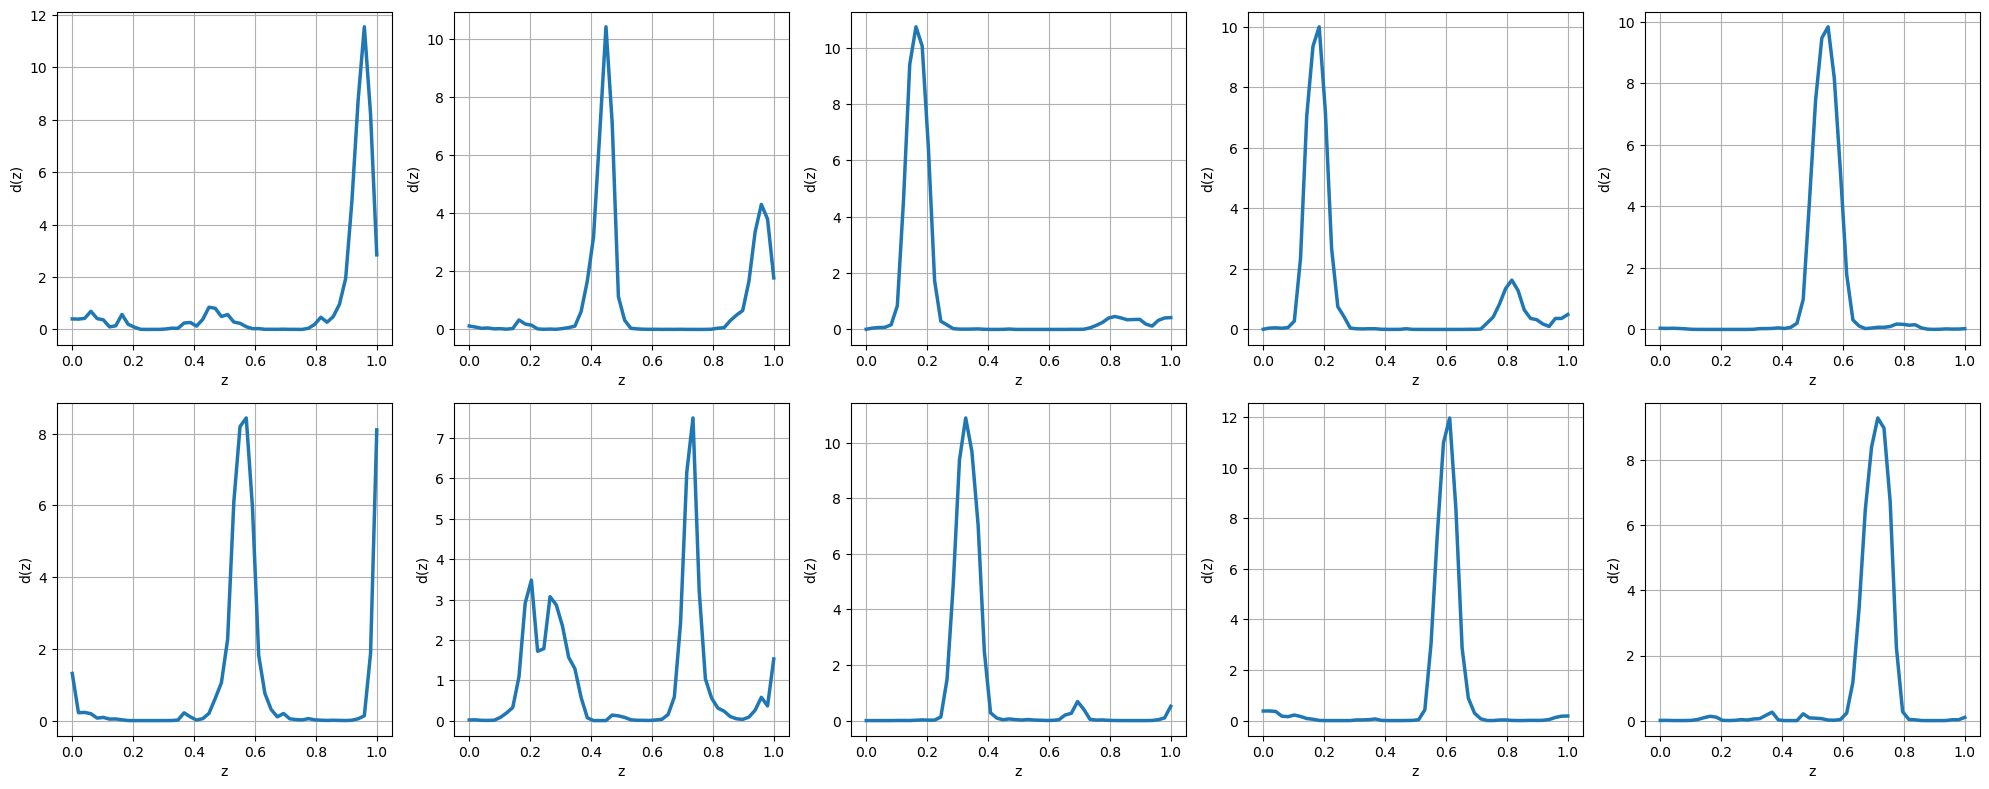

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows × 5 columns
axes = axes.flatten()

x = generate_leaks(grid, 10, random_state=3)


print(x.shape)

#z = model.net.encoder(x)[0]

z = torch.randn(10, 4)
x_hat = model.net.decoder(z).detach().numpy()


print(x_hat.shape)
#x_hat = model.net(x)[0].detach()


for j, ax in enumerate(axes):
    #ax.plot(grid, x[j,:], label=f"Sample {j+1}", linewidth=2.5)
    ax.plot(grid, x_hat[j,:], label=f"Sample {j+1}", linewidth=2.5)
    ax.set_xlabel("z")
    ax.set_ylabel("d(z)")
    ax.grid(True)

plt.tight_layout()
plt.show()